# Shoe Price Dataset

Pick a dataset and perform an unsupervised learning on it. Your dataset has to
be different from any dataset seen during the course Ideally, your algorithm should
answer an interesting question about the dataset. The unsupervised learning can
then be either a clustering, a dimensionality reduction or a regression.
You are free to choose the dataset within the following constraints :
— several hundreds of lines
— at least 6 attributes (columns), the first being a unique id
— some features may be categorical (non quantitative).
If necessary, you can tweak an existing dataset in order to artificially make it
possible to apply analysis ans visualization techniques. Example resources to find
datasets :
— Link 1
— Link 2
— Link 2
— Link 4
You could start with a general analysis of the dataset, with for instance a file
analysis.py that studies :
— histograms of quantitative variables with a comment on important statistical
aspects, such as means , standard deviations , etc.
— A study of potential outliers
— Correlation matrices (maybe not for all variables)
— Any interesting analysis : if you have categorical data, with categories are re-
presented most ? To what extent ?
If the dataset is very large you may also extract a random sample of the dataset to
build histogram or compute correlations. You can discuss whether the randomness
of the sample has an important influence on the analysis result (this will depend on
the dataset).
third-party libraries 5
Whether it is a clustering, a dimensionality reduction or a density estimation, you
should provide an evaluation of your processing. This can for instance be
— for a clustering, it can be an inertia, a normalized cut...
— for a dimensionality reduction, the explained variance
— for a density estimation, the kullbach leibler divergence between the dataset
and a dataset sampled from the estimated distribution
— but you are encouraged to use other evaluations if they are more relevant for
your processing.
Short docstrings in the python files will be appreciated, at least at the beginning
of each file.
In our report, you could include for instance :
— general informations on the dataset found in the analysis file.
— a potential comparison between several algorithm / models that you explored,
if relevant
— a presentation of the method used to tune the algorithms (choice of hyperpa-
rameters, cross validation, etc).
— a short discussion of the results
Feel free to add useful visualizations for each step of your processing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
dataframe = pd.read_csv("/work/part 5/Shoe prices.csv")
dataframe['Size'] = dataframe['Size'].str.replace(r'[^\d.]+', '')
dataframe['Size'] = dataframe['Size'].astype(float)
dataframe = dataframe.rename(columns={'Price (USD)': 'Price'})
dataframe['Price'] = dataframe['Price'].str.replace(r'[^\d.]+', '')
dataframe['Price'] = dataframe['Price'].astype(float)
dataframe['Gender'] = dataframe['Gender'].replace(to_replace='Men', value='1')
dataframe['Gender'] = dataframe['Gender'].replace(to_replace='Women', value='0')
dataframe['Gender'] = dataframe['Gender'].astype(int)
dataframe = dataframe.drop(columns='Material')
dataframe = dataframe.drop(columns='Model')
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brand   1006 non-null   object 
 1   Type    1006 non-null   object 
 2   Gender  1006 non-null   int64  
 3   Size    1006 non-null   float64
 4   Color   1006 non-null   object 
 5   Price   1006 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.3+ KB
/tmp/ipykernel_329/1219816943.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['Size'] = dataframe['Size'].str.replace(r'[^\d.]+', '')
/tmp/ipykernel_329/1219816943.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['Price'] = dataframe['Price'].str.replace(r'[^\d.]+', '')


Let's update few columns format in order to make data analysis easier.

## Data Analysis

In [3]:
print(dataframe.shape)
dataframe.head()

(1006, 6)


,Brand,Type,Gender,Size,Color,Price
0,Nike,Basketball,1,10.0,Red/Black,170.0
1,Adidas,Running,1,9.5,Black,180.0
2,Reebok,Casual,1,11.0,White,75.0
3,Converse,Casual,0,8.0,Navy,55.0
4,Puma,Lifestyle,0,7.5,Pink,80.0


We can see that our dataset contain 6 column and 1006 row.

In [4]:
#print(f'Every Brand : {dataframe.Brand.unique()}')
df = pd.DataFrame()

for x in dataframe.Brand.unique(): df[x] = [dataframe.loc[dataframe['Brand'] == x].shape[0]]
df.head()

,Nike,Adidas,Reebok,Converse,Puma,Vans,New Balance,Asics,Fila,Skechers
0,118,100,100,100,100,100,100,100,99,89


There seems to be a good repartition of the brands.

In [5]:
print(f'Every Gender : {dataframe.Gender.unique()}')
print(f'Number of Men: {dataframe.loc[dataframe.Gender == 0].shape[0]}')
print(f'Number of Woman: {dataframe.loc[dataframe.Gender == 1].shape[0]}')


Every Gender : [1 0]
Number of Men: 471
Number of Woman: 535


There are 2 genders almost equally split in the dataset.

In [6]:
print(f'Every Color : {dataframe.Color.unique()}')

Every Color : ['Red/Black' 'Black' 'White' 'Navy' 'Pink' 'Black/White' 'Grey' 'Blue'
 'White/Green' 'Yellow' 'Purple' 'Black/Pink' 'Blue/Orange' 'Black/Red'
 'Checkered' 'Black/Grey' 'White/Red' 'Beige' 'Orange' 'White/Navy'
 'White/Blue' 'Red' 'Green' 'Red/White' 'Black/Yellow' 'White/Pink'
 'Blue/White' 'White/Grey' 'Cream' 'White/Navy/Red' 'Yellow/Black'
 'Navy/White' 'Grey/Pink' 'Grey/Green' 'White/Red/Navy' 'White/Black'
 'Grey/Purple' 'Black/Green' 'Black/Blue' 'Pink/White' 'Blue/Green'
 'Zebra' 'Khaki' 'Checkerboard' 'Grey/Yellow' 'Ivory' 'Egret'
 'Grey/Orange' 'Grey/Black' 'Green/Orange' 'Black/Gold'
 'Black/White Checkerboard' 'Cream White' 'Green/White'
 'Checkerboard Black/White' 'Blue/Black' 'Cloud White' 'Grey/White'
 'Navy/Red' 'Multi-color' 'Pink/Black' 'Sunflower' 'Blue/Red'
 'Silver/White' 'Black/Gum' 'Egret/Black' 'True White' 'Blue/Pink'
 'Black/Gold/Red' 'Natural' 'Burgundy' 'Charcoal' 'Cinder' 'Blue/Yellow'
 'White/Red/Blue' 'Silver' 'White/Gold' 'Brown' 'Green/Bla

There are a lot of colors, let's fix that ....

In [7]:
dataframe["Color"] = dataframe["Color"].str.split("/", expand=True)[0]
print(f'Every Color : {dataframe.Color.unique()}')

Every Color : ['Red' 'Black' 'White' 'Navy' 'Pink' 'Grey' 'Blue' 'Yellow' 'Purple'
 'Checkered' 'Beige' 'Orange' 'Green' 'Cream' 'Zebra' 'Khaki'
 'Checkerboard' 'Ivory' 'Egret' 'Cream White' 'Checkerboard Black'
 'Cloud White' 'Multi-color' 'Sunflower' 'Silver' 'True White' 'Natural'
 'Burgundy' 'Charcoal' 'Cinder' 'Brown' 'Clay Brown' 'Natural Ivory'
 'Collegiate Navy']


In [8]:
#print(f'Every Type : {dataframe.Type.unique()}')
df = pd.DataFrame()
for x in dataframe.Type.unique(): df[x] = [dataframe.loc[dataframe['Type'] == x].shape[0]]
df.head()

,Basketball,Running,Casual,Lifestyle,Skate,Fashion,Walking,Cross-training,Slides,Crossfit,Training,Trail,Trail Running,Weightlifting,CrossFit,Hiking,Racing,Retro
0,52,332,243,76,100,86,46,1,3,11,34,6,3,4,3,2,1,3


There are a lot of shoes type that are in low quantity. Let's remove them from the dataset.

In [9]:
dataframe = dataframe[(dataframe['Type'] != "Cross-training") & (dataframe['Type'] != "Crossfit") & (dataframe['Type'] != "Slides") & (dataframe['Type'] != "Training") & (dataframe['Type'] != "Trail") & (dataframe['Type'] != "Trail Running") & (dataframe['Type'] != "Weightlifting") & (dataframe['Type'] != "CrossFit")& (dataframe['Type'] != "Hiking") & (dataframe['Type'] != "Racing") & (dataframe['Type'] != "Retro")]
df = pd.DataFrame()
for x in dataframe.Type.unique(): df[x] = [dataframe.loc[dataframe['Type'] == x].shape[0]]
df.head()

,Basketball,Running,Casual,Lifestyle,Skate,Fashion,Walking
0,52,332,243,76,100,86,46


In [10]:
print(f'Every Type : {dataframe.Type.unique()}')


Every Type : ['Basketball' 'Running' 'Casual' 'Lifestyle' 'Skate' 'Fashion' 'Walking']


Min : 6.0
Max : 12.0
Median : 9.0
Mean : 8.880213903743316
Std : 1.4462474358992041


<AxesSubplot: ylabel='Size'>

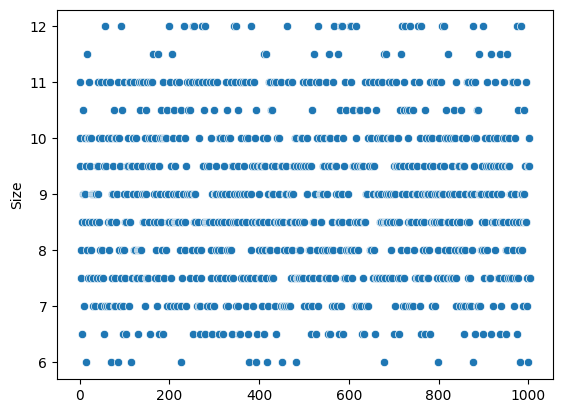

In [11]:
print(f'Min : {dataframe.Size.min()}')
print(f'Max : {dataframe.Size.max()}')
print(f'Median : {dataframe.Size.median()}')
print(f'Mean : {dataframe.Size.mean()}')
print(f'Std : {dataframe.Size.std()}')

sns.scatterplot(data=dataframe['Size'])

Min : 50.0
Max : 250.0
Median : 90.0
Mean : 100.4267165775401
Std : 39.283080807246584


<AxesSubplot: ylabel='Price'>

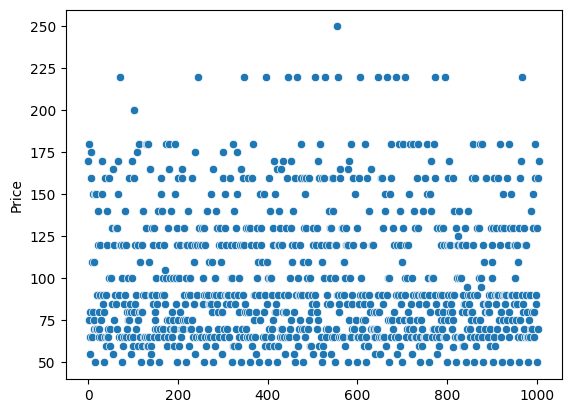

In [12]:
print(f'Min : {dataframe.Price.min()}')
print(f'Max : {dataframe.Price.max()}')
print(f'Median : {dataframe.Price.median()}')
print(f'Mean : {dataframe.Price.mean()}')
print(f'Std : {dataframe.Price.std()}')

sns.scatterplot(data=dataframe['Price'])

## Preprocessing

Let's convert the categorical data into numbers.

In [13]:
dataframe.head()

,Brand,Type,Gender,Size,Color,Price
0,Nike,Basketball,1,10.0,Red,170.0
1,Adidas,Running,1,9.5,Black,180.0
2,Reebok,Casual,1,11.0,White,75.0
3,Converse,Casual,0,8.0,Navy,55.0
4,Puma,Lifestyle,0,7.5,Pink,80.0


In [14]:
#Avec Preprocessing
labels = dataframe.columns
print(labels)

data = dataframe.copy()

leBrand = preprocessing.LabelEncoder()
leType = preprocessing.LabelEncoder()
leColor = preprocessing.LabelEncoder()

mmsSize = preprocessing.MinMaxScaler()
mmsPrice = preprocessing.MinMaxScaler()
mmsColor = preprocessing.MinMaxScaler()
mmsBrand = preprocessing.MinMaxScaler()
mmsType = preprocessing.MinMaxScaler()


data['Brand'] = leBrand.fit_transform(dataframe['Brand'])
data['Type'] = leType.fit_transform(dataframe['Type'])
data['Color'] = leColor.fit_transform(dataframe['Color'])
data['Size'] = mmsSize.fit_transform(data['Size'].values.reshape(-1, 1))
data['Price'] = mmsPrice.fit_transform(data['Price'].values.reshape(-1, 1))
data['Color'] = mmsColor.fit_transform(data['Color'].values.reshape(-1, 1))
data['Brand'] = mmsBrand.fit_transform(data['Brand'].values.reshape(-1, 1))
data['Type'] = mmsType.fit_transform(data['Type'].values.reshape(-1, 1))

lab = "Brand"
labels = data[lab]
#data = data.drop(columns=lab)



data.head()



Index(['Brand', 'Type', 'Gender', 'Size', 'Color', 'Price'], dtype='object')


,Brand,Type,Gender,Size,Color,Price
0,0.555556,0.000000,1,0.666667,0.81250,0.600
1,0.000000,0.666667,1,0.583333,0.03125,0.650
2,0.777778,0.166667,1,0.833333,0.93750,0.125
3,0.222222,0.166667,0,0.333333,0.68750,0.025
4,0.666667,0.500000,0,0.250000,0.75000,0.150


## Corellation

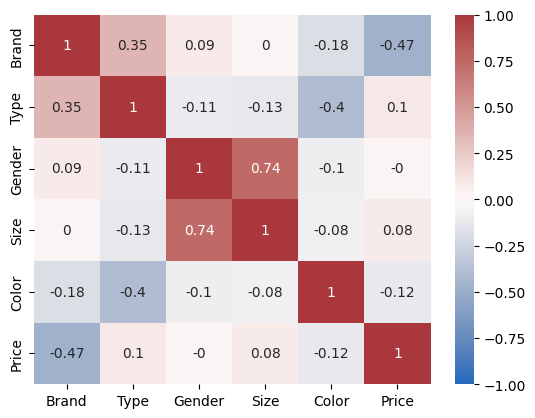

In [15]:
matrix = data.corr().round(2)

sns.heatmap(matrix, annot=True,  vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

We can see that there is a correlation between the size of the shoe and the gender. Same for the price of the shoe and the brand and the type of the shoe and the brand. The comment below  should be taken with a grain of salt since some data are categorical.

## Dimensionality reduction

We will display the variance of the number of components.

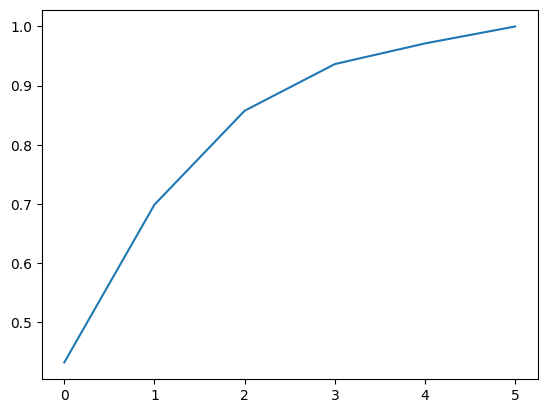

In [16]:
pca = PCA(n_components=6)
projected_data = pca.fit_transform(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

We can see that the variance is very good with 3 components.

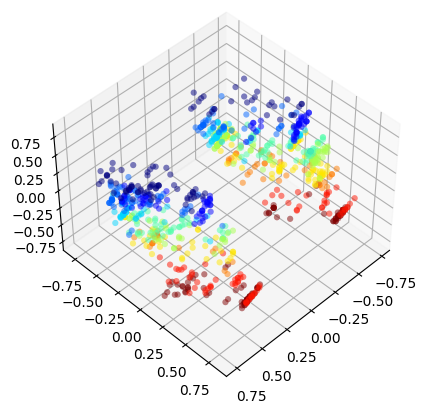

In [17]:
pca2 = PCA(n_components=3)
projected_data2 = pca2.fit_transform(data)

plt.figure()

ax = plt.axes(projection='3d')
ax.view_init(45, 45, 0)
ax.scatter(
    projected_data2[:, 0],
    projected_data2[:, 1],
    projected_data2[:, 2],
    c=labels,
    edgecolor="none",
    alpha=0.5,
    cmap=plt.cm.get_cmap("jet", 10)
)

We can see how the samples in the dataset are organised in 3D space. We can see how the brands are organised by keeping 3 components. We can see that the samples of the same brand are quite grouped but the dataset is complicated to analyse visually.

# Clustering

Now that we have a dataset organised as a 3 dimensional array, we can try to cluster our data and display the result correctly.

I will use the k-means algorithm for this part. First of all, we will find the optimal number of clusters for this dataset by using the k-means algorithm's inertia value by finding where the value is the minimum or where it doesn't decrease much.

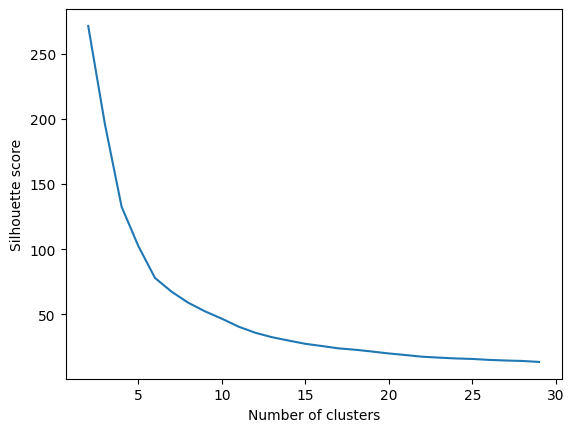

In [18]:
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

silhouettes = []
inertias = []

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    # y_means = kmeans.fit_predict(projected_data2)
    # silhouettes.append(silhouette_score(projected_data2, y_kmeans))
    kmeans.fit(projected_data2)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 30), inertias)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.show()

By running the algorithm, we can see that the best value of clusters is between 20 and 25. It is a huge amount of clusters, so let's  now setup the algorithm with 20 clusters and plot the result.

In [19]:
kmeans = KMeans(n_clusters=20, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(projected_data2)
print("Centroids: ", kmeans.cluster_centers_)

Centroids:  [[-0.58078725  0.09812886  0.18254866]
 [ 0.60235739 -0.38130142 -0.13917516]
 [ 0.48245318  0.73774214 -0.27252775]
 [-0.47098384 -0.56023922 -0.19978602]
 [-0.55680092  0.61402081 -0.27373347]
 [-0.57507891  0.37327371  0.13993221]
 [ 0.50922609  0.27660258  0.54846823]
 [ 0.6027365  -0.28260558  0.24999911]
 [ 0.56780881  0.23066587 -0.5608497 ]
 [-0.48718077 -0.09078699 -0.10757389]
 [-0.45551089 -0.29623393  0.35532053]
 [-0.40638223 -0.63702339  0.01951246]
 [ 0.56032937  0.01713962 -0.02649441]
 [-0.54918369  0.15959652  0.55410835]
 [ 0.59091977 -0.52311657  0.05311689]
 [-0.46198167  0.123044   -0.60732792]
 [ 0.46804132  0.44787577  0.14029122]
 [ 0.55073335 -0.19363109 -0.36267028]
 [ 0.57534462 -0.10369378  0.5236905 ]
 [-0.49314682 -0.35237374 -0.3930592 ]]


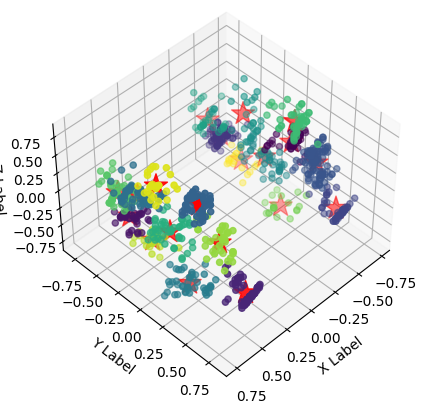

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(45, 45, 0)
ax.scatter(projected_data2[:, 0], projected_data2[:, 1], projected_data2[:, 2], c=y_kmeans, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='*', s=300, c='red')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

The clustering is working properly on the reduced dataset, even if we don't have any real purpose to cluster this data together. I also think that a too high number of cluster is useful because we lose the interest of clustering. It would be more interesting to cluster the data with a number of 15, maybe even 10 clusters.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=78fee1a8-8fdd-4237-ba69-e565ec384717' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>